In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#reading cleaned dataset
df = pd.read_csv('credit_card.csv')
df.head()

C:\Users\Student\AppData\Local\Temp\ipykernel_15176\1116173489.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_card.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Unnamed: 28,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good,NaN,265.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good,NaN,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good,NaN,267.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good,NaN,268.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good,NaN,269.0


In [3]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

In [3]:
df = df.drop(['Unnamed: 28'],axis=1)

In [4]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Months'],
      dtype='object')

In [5]:
#checking for null columns 
df.shape

(100046, 29)

In [6]:
#some empty columns are added while adding credit_History_Months column. 
#Deleting last empty rows 
df = df[1:100000]
#shape of dataset after deleting empty rows
print(f"The shape of dataset is {df.shape}")

The shape of dataset is (99999, 29)


In [7]:
#datatypes
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [8]:
#checking null values in dataset
print(df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
Credit_History_Months        9030
dtype: int64


In [9]:
#converting string to numeric data , as the data in numeric nature
# replacing their nan values with the median for all of them 
df['Age']                 =  pd.to_numeric(df['Age'],errors='coerce')
df['Age']                 = df['Age'].fillna(df['Age'].median())

df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'],errors='coerce')

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'],errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())

df['Num_of_Loan']     =  pd.to_numeric(df['Num_of_Loan'],errors='coerce')
df['Num_of_Loan']     = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())

df['Annual_Income'] = pd.to_numeric(df['Annual_Income'],errors='coerce')
df['Annual_Income']    = df['Annual_Income'].fillna(df['Annual_Income'].median())

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())

df['Num_Credit_Inquiries'] =  pd.to_numeric(df['Num_Credit_Inquiries'],errors='coerce')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())

df['Outstanding_Debt'] =   pd.to_numeric(df['Outstanding_Debt'],errors='coerce')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].mean())




In [10]:
#After changing datatypes 
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [11]:
# The name column is having lot of unknown values , as name does not effect the credit score , replacing them with the common
# name 'John'
df['Name'] = df['Name'].fillna('John')
# replacing Monthly Inhand salary with the median value 
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

In [12]:
# so the number of delayed payments is having only 699 values for the 100000 data points which are repeated then the missing 
# values to be  replced with most occuring values.

len(df['Num_of_Delayed_Payment'].unique())


699

In [13]:
# Replacing with missing values of Num of Delayed_Payments with mode values
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mode())

In [14]:
#made a credit history column usig excel converted to months 
# replacing all month values with mean value 
# Dropping Credit_History_Age column
df = df.drop(['Credit_History_Age'],axis=1)
df['Credit_History_Months'] = df['Credit_History_Months'].fillna(df['Credit_History_Months'].mean())

In [15]:
# Amount_invested_monthly is having 4479 null values , replacing them with the next or previous value
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(method="bfill")

In [16]:
# Replacing NUm_credit_Inquiries with the mean
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())
# Replacing Monthly_Balance with the median
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

In [17]:
#Type of Loan has most number of missing values
len(df['Type_of_Loan'].unique())

6261

In [18]:
#Replacing Type of Loan with the most occuring value in the data
df = df.fillna(df['Type_of_Loan'].value_counts().index[0])

In [19]:
# The target variable Credit_score has 3 values
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [20]:
#Now checking for missing values
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_History_Months       0
dtype: int64


In [21]:
# Shape of dataframe now
df.shape

(99999, 28)

In [22]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Months'],
      dtype='object')

# Explanatrory data analysis

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

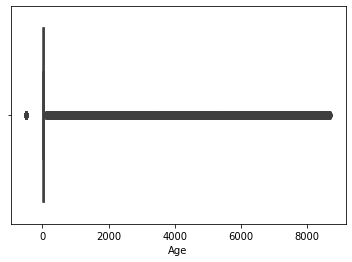

In [23]:
sns.boxplot(df['Age'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

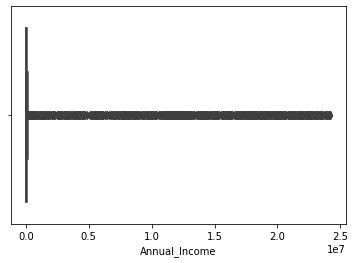

In [24]:
#Box plot for annaul income
sns.boxplot(df['Annual_Income'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

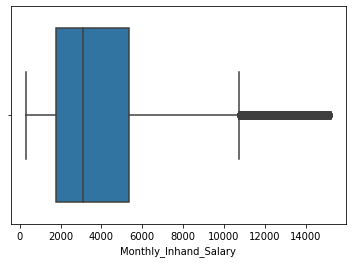

In [25]:
#Box plot for Monthly_Inhand_Salary
sns.boxplot(df['Monthly_Inhand_Salary'])
#It has some outliers

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

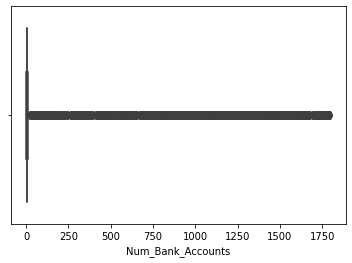

In [26]:
#Box plot for Num_bank_Accounts
sns.boxplot(df['Num_Bank_Accounts'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Card'>

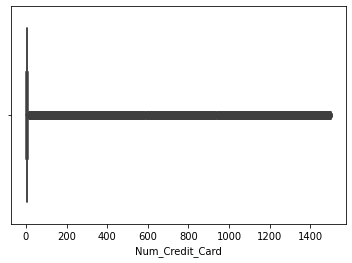

In [27]:
# Box plot for Num_credit_card
sns.boxplot(df['Num_Credit_Card'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

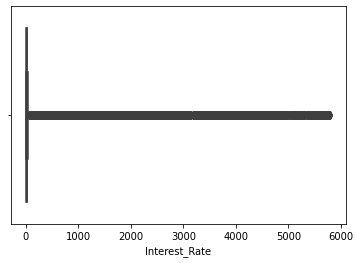

In [28]:
#Box plot for Interest_Rate
sns.boxplot(df['Interest_Rate'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Loan'>

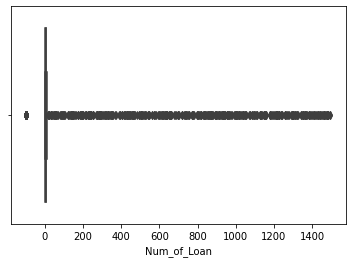

In [29]:
#Box plot for Num_of_Loan
sns.boxplot(df['Num_of_Loan'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

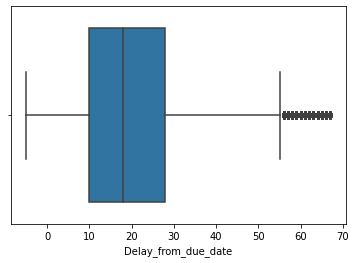

In [30]:
#Box plot for 'Delay_from_due_date'
sns.boxplot(df['Delay_from_due_date'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

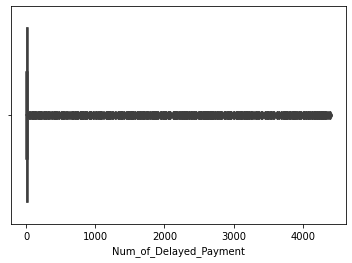

In [31]:
#Box plot for 'Num_of_Delayed_Payment'
sns.boxplot(df['Num_of_Delayed_Payment'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Changed_Credit_Limit'>

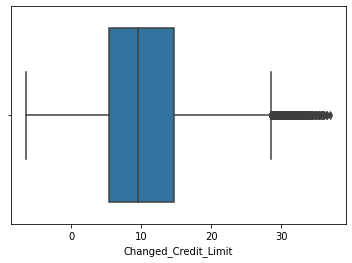

In [32]:
#Box plot for 'Changed_Credit_Limit'
sns.boxplot(df['Changed_Credit_Limit'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

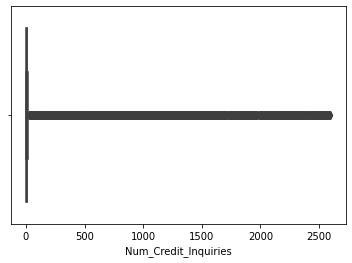

In [33]:
#Box plot for 'Num_Credit_Inquiries'
sns.boxplot(df['Num_Credit_Inquiries'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstanding_Debt'>

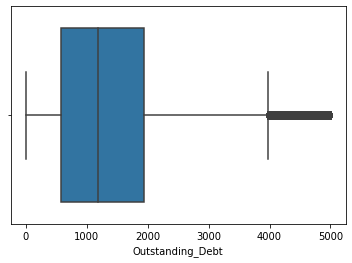

In [34]:
#Box plot for 'Outstanding_Debt'
sns.boxplot(df['Outstanding_Debt'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

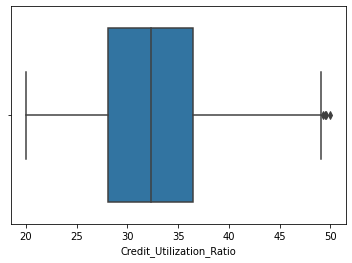

In [35]:
#Box plot for 'Credit_Utilization_Ratio'
sns.boxplot(df['Credit_Utilization_Ratio'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

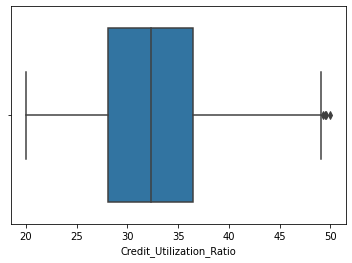

In [36]:
#Box plot for 'Credit_Utilization_Ratio'
sns.boxplot(df['Credit_Utilization_Ratio'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_EMI_per_month'>

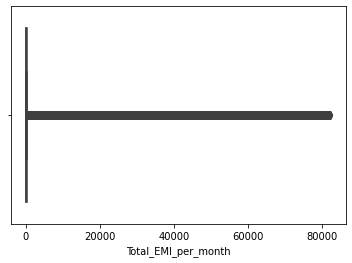

In [37]:
#Box plotfor 'Total_EMI_per_month'
sns.boxplot(df['Total_EMI_per_month'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_invested_monthly'>

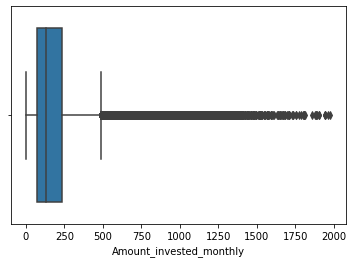

In [38]:
#Box plot for 'Amount_invested_monthly'
sns.boxplot(df['Amount_invested_monthly'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Balance'>

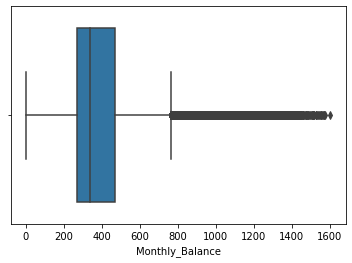

In [39]:
#Box plot for 'Monthly_Balance'
sns.boxplot(df['Monthly_Balance'])

Text(0.5, 1.0, 'Count of no of credit score rating')

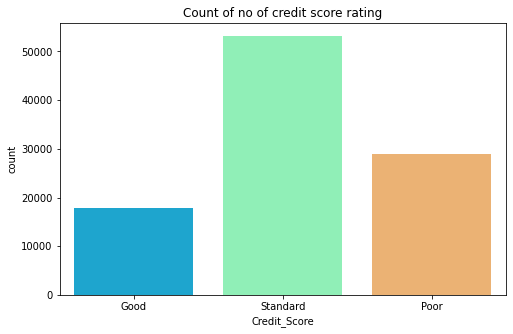

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='Credit_Score',data=df, palette='rainbow')
plt.title("Count of no of credit score rating")

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History_Months'>

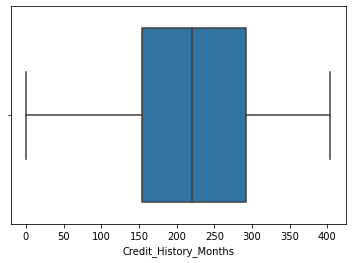

In [41]:
#Box plot for 'Credit_History_Months'
sns.boxplot(df['Credit_History_Months'])

In [42]:
#Finding correlation coefficients for all numerical data
df1 = df[['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
         'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Credit_History_Months']]

In [43]:
corr_matrix = np.round(df1.corr(), 2)
corr_matrix

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
Age,1.00,0.00,0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00
Annual_Income,0.00,1.00,0.03,-0.01,0.00,-0.00,0.00,-0.01,0.00,0.00,0.00,-0.00,0.01,-0.00,0.02,0.02,-0.00
Monthly_Inhand_Salary,0.00,0.03,1.00,-0.01,-0.00,-0.01,-0.01,-0.23,0.00,-0.16,-0.01,-0.24,0.16,0.01,0.56,0.63,0.24
Num_Bank_Accounts,0.00,-0.01,-0.01,1.00,-0.00,-0.00,-0.00,0.02,-0.00,0.01,-0.00,0.02,-0.00,-0.00,-0.01,-0.01,-0.01
Num_Credit_Card,-0.00,0.00,-0.00,-0.00,1.00,-0.00,0.00,0.01,0.00,0.01,-0.00,0.01,-0.00,0.00,-0.00,-0.01,-0.01
Interest_Rate,-0.01,-0.00,-0.01,-0.00,-0.00,1.00,0.00,0.01,0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.01,-0.01
Num_of_Loan,-0.00,0.00,-0.01,-0.00,0.00,0.00,1.00,0.01,0.01,0.02,-0.00,0.02,-0.00,0.00,-0.01,-0.02,-0.02
Delay_from_due_date,-0.01,-0.01,-0.23,0.02,0.01,0.01,0.01,1.00,0.01,0.29,0.01,0.57,-0.06,-0.00,-0.16,-0.28,-0.47
Num_of_Delayed_Payment,-0.00,0.00,0.00,-0.00,0.00,0.00,0.01,0.01,1.00,0.01,0.00,0.01,0.00,0.00,-0.00,-0.00,-0.01
Changed_Credit_Limit,-0.00,0.00,-0.16,0.01,0.01,0.00,0.02,0.29,0.01,1.00,0.01,0.45,-0.05,-0.00,-0.11,-0.20,-0.40


In [44]:
#All numerical  features are independent not related to each other

# Using label Encoder to get numerical Labels

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [46]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Months'],
      dtype='object')

In [47]:
#Dropping redundant features which of no use
# 1. ID
# 2. Customer_ID
# 3. Name
# 4. SSN

In [48]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [49]:
#using label encoder to transform categorical data to numerical data
le.fit(df['Occupation'])
df['Occupation'] = le.transform(df['Occupation'])
# Type_of_Loan changing to numerical data
le.fit(df['Type_of_Loan'])
df['Type_of_Loan'] = le.transform(df['Type_of_Loan'])
# Credit_Mix changing to numerical data
le.fit(df['Credit_Mix'])
df['Credit_Mix'] = le.transform(df['Credit_Mix'])
# Payment_of_Min_Amount changing to numerical data
le.fit(df['Payment_of_Min_Amount'])
df['Payment_of_Min_Amount'] = le.transform(df['Payment_of_Min_Amount'])
# Payment_Behaviour changing to numerical data
le.fit(df['Payment_Behaviour'])
df['Payment_Behaviour'] = le.transform(df['Payment_Behaviour'])
# credit Score changing to numerical data
le.fit(df['Credit_Score'])
df['Credit_Score'] = le.transform(df['Credit_Score'])
# Month Chaning to numerical data
le.fit(df['Month'])
df['Month'] = le.transform(df['Month'])

In [50]:
# Data file saving without removing outliers
# saving data file after preprocessing the data 
#saving into clenaed csv file
df.to_csv('C:\\Users\\Student\\Desktop\\INDE_project\\credit_data_process-1.csv')


In [51]:
# df1 is having all numerical features
# Removing outliers for all of those features
# replacing them with the nearest min, max values.
for x in df1.columns:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    med = df1.loc[:,x].median()
 
    df1.loc[df1[x] < min,x] = min
    df1.loc[df1[x] > max,x] = max


C:\Users\Student\AppData\Local\Temp\ipykernel_8664\710423211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1[x] < min,x] = min
C:\Users\Student\AppData\Local\Temp\ipykernel_8664\710423211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1[x] > max,x] = max
C:\Users\Student\AppData\Local\Temp\ipykernel_8664\710423211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1[x] < min,x] = min
C:\User

# Box plots after removing outliers

In [52]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],
      dtype='object')

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

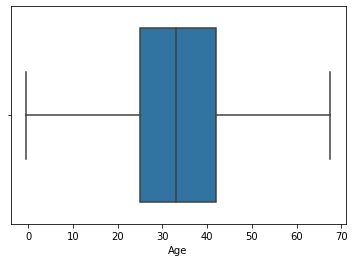

In [53]:
#box plot for age after removing outliers
sns.boxplot(df1['Age'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

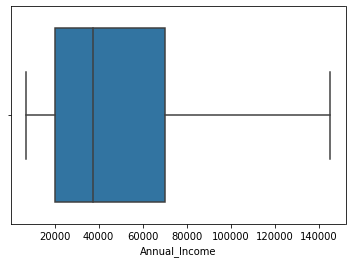

In [55]:
#box plot for Annual Income after removing outliers
sns.boxplot(df1['Annual_Income'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

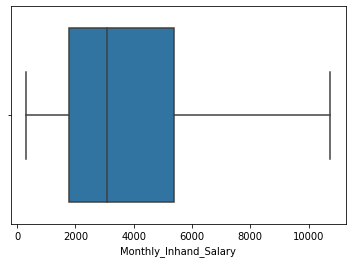

In [56]:
#box plot for Monthly Inhand Salary
sns.boxplot(df1['Monthly_Inhand_Salary'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

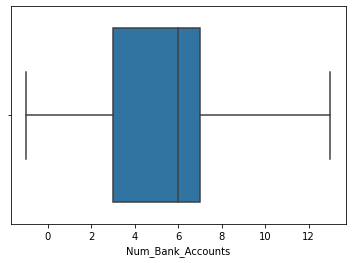

In [57]:
#box plot for Num_Bank_Accounts
sns.boxplot(df1['Num_Bank_Accounts'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Card'>

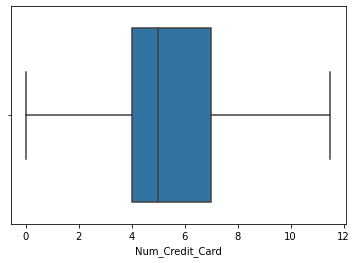

In [58]:
#box plot for 'Num_Credit_Card'
sns.boxplot(df1['Num_Credit_Card'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

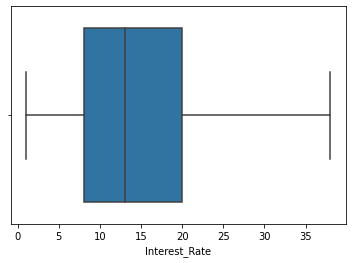

In [59]:
#box plot for 'Interest_Rate'
sns.boxplot(df1['Interest_Rate'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Loan'>

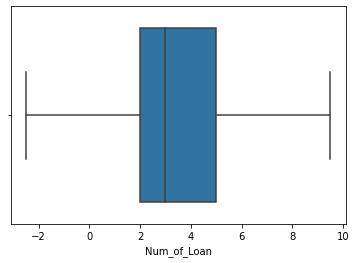

In [60]:
#box plot for 'Num_of_Loan'
sns.boxplot(df1['Num_of_Loan'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

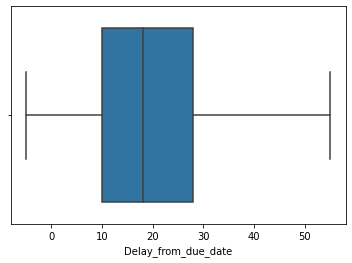

In [61]:
#box plot for 'Delay_from_due_date'
sns.boxplot(df1['Delay_from_due_date'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

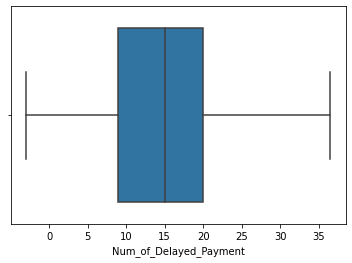

In [62]:
#box plot for 'Num_of_Delayed_Payment'
sns.boxplot(df1['Num_of_Delayed_Payment'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Changed_Credit_Limit'>

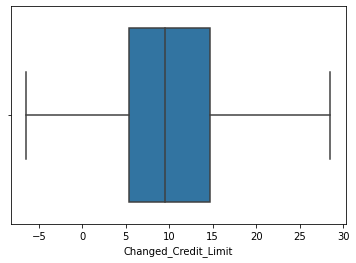

In [63]:
#box plot for  'Changed_Credit_Limit'
sns.boxplot(df1[ 'Changed_Credit_Limit'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

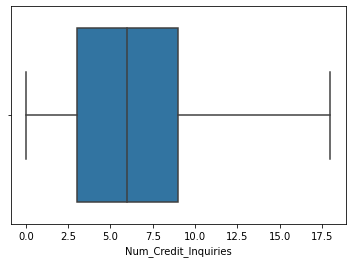

In [64]:
#box plot for 'Num_Credit_Inquiries'
sns.boxplot(df1['Num_Credit_Inquiries'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstanding_Debt'>

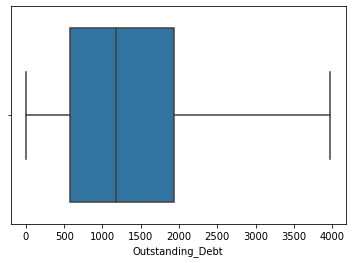

In [65]:
#box plot for 'Outstanding_Debt'
sns.boxplot(df1['Outstanding_Debt'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

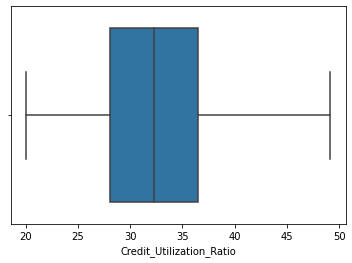

In [66]:
#box plot for  'Credit_Utilization_Ratio'
sns.boxplot(df1[ 'Credit_Utilization_Ratio'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_EMI_per_month'>

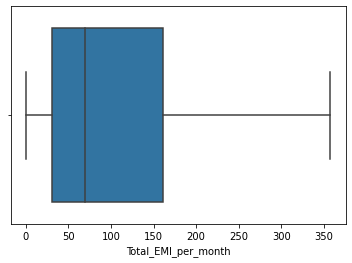

In [67]:
#box plot for 'Total_EMI_per_month'
sns.boxplot(df1['Total_EMI_per_month'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_invested_monthly'>

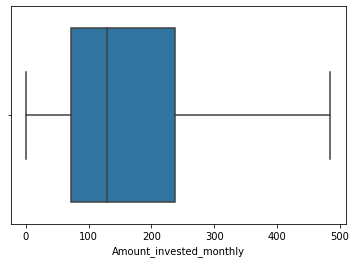

In [68]:
#box plot for 'Amount_invested_monthly'
sns.boxplot(df1['Amount_invested_monthly'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Balance'>

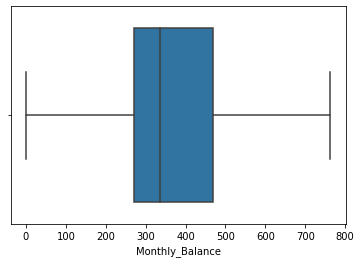

In [69]:
#box plot for 'Monthly_Balance'
sns.boxplot(df1['Monthly_Balance'])

# saving the data after removing outliers

In [70]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],
      dtype='object')

In [71]:
#dropping numerical columns from the data  
df2 = df.drop(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],axis=1)

In [72]:
df.shape

(99999, 28)

In [73]:
#making a dataframe without ooutliers and changing categorical to one hot encoding 
data = pd.concat([df2,df1],axis=1)
data.head()

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
1,0x1603,CUS_0xd40,2,Aaron Maashoh,821-00-0265,12,128,1,1,4,...,-1.0,31.033317,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629163,220.840847
2,0x1604,CUS_0xd40,6,Aaron Maashoh,821-00-0265,12,128,1,1,5,...,3.0,7.000000,10.389016,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267.000000
3,0x1605,CUS_0xd40,0,Aaron Maashoh,821-00-0265,12,128,1,1,6,...,5.0,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268.000000
4,0x1606,CUS_0xd40,7,Aaron Maashoh,821-00-0265,12,128,1,1,2,...,6.0,31.033317,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269.000000
5,0x1607,CUS_0xd40,5,Aaron Maashoh,821-00-0265,12,128,1,1,0,...,8.0,4.000000,9.270000,4.0,809.98,27.262259,49.574949,62.430172,340.479212,270.000000


In [74]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Months'],
      dtype='object')

In [75]:
# Dropping Redundant features 
# 1. ID
# 2. Customer_ID
# 3. Name
# 4.SSN

data = data.drop(['ID','Customer_ID','Name','SSN'],axis=1)
data.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
1,2,12,128,1,1,4,0,23.0,19114.12,3093.745000,...,-1.0,31.033317,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629163,220.840847
2,6,12,128,1,1,5,0,-0.5,19114.12,3093.745000,...,3.0,7.000000,10.389016,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267.000000
3,0,12,128,1,1,6,0,23.0,19114.12,3093.745000,...,5.0,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268.000000
4,7,12,128,1,1,2,0,23.0,19114.12,1824.843333,...,6.0,31.033317,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269.000000
5,5,12,128,1,1,0,0,23.0,19114.12,3093.745000,...,8.0,4.000000,9.270000,4.0,809.98,27.262259,49.574949,62.430172,340.479212,270.000000


In [79]:
#making all negative values to zero
data[data<0]=0

In [80]:
data.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
1,2,12,128,1,1,4,0,23.0,19114.12,3093.745000,...,0.0,31.033317,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629163,220.840847
2,6,12,128,1,1,5,0,0.0,19114.12,3093.745000,...,3.0,7.000000,10.389016,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267.000000
3,0,12,128,1,1,6,0,23.0,19114.12,3093.745000,...,5.0,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268.000000
4,7,12,128,1,1,2,0,23.0,19114.12,1824.843333,...,6.0,31.033317,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269.000000
5,5,12,128,1,1,0,0,23.0,19114.12,3093.745000,...,8.0,4.000000,9.270000,4.0,809.98,27.262259,49.574949,62.430172,340.479212,270.000000


In [82]:
data.to_csv('C:\\Users\\Student\\Desktop\\INDE_project\\credit_data_process-2.csv')